In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.patches import Rectangle


In [6]:
df = pd.read_csv('Data/BeltersRex6-11.csv')
df['PlateLocSide'] = df['PlateLocSide'] * -1

In [3]:
pitcher_name = "Nick Krueger"

In [8]:
df = df[df['Pitcher'] == pitcher_name]

NameError: name 'pitcher_name' is not defined

In [7]:
batter_name = 'Shea Zbrozek'

In [8]:
df = df[df['Batter'] == batter_name]

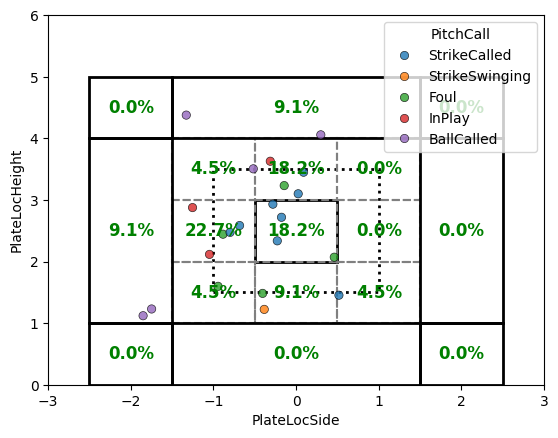

In [10]:
sns.scatterplot(
    x=df['PlateLocSide'], y=df['PlateLocHeight'],
    sizes=(50, 500),  # Adjust min and max bubble size
    ec='black',
    alpha=0.8,
    zorder=2,
    hue=df['PitchCall']
)

# Add the strike zone rectangle (dotted black line)
strike_zone = Rectangle(
    (-1, 1.5), 2, 2.0, fill=False, edgecolor='black', linewidth=2, zorder=1, linestyle='dotted'
)
plt.gca().add_patch(strike_zone)
plt.xlim(-3, 3)
plt.ylim(0, 6)

# Heart of the plate rectangle (center square)
heart_left, heart_bottom, heart_width, heart_height = -0.5, 2, 1, 1.0
strike_zone_heart = Rectangle(
    (heart_left, heart_bottom), heart_width, heart_height,
    fill=False, edgecolor='black', linewidth=2, zorder=1
)
plt.gca().add_patch(strike_zone_heart)

# Add 8 shadow rectangles around the heart to form a 3x3 grid and calculate percentages
for dx in [-1, 0, 1]:
    for dy in [-1, 0, 1]:
        left = heart_left + dx * heart_width
        bottom = heart_bottom + dy * heart_height
        # Draw the rectangle
        if dx == 0 and dy == 0:
            # Heart (center)
            rect = strike_zone_heart
        else:
            rect = Rectangle(
                (left, bottom), heart_width, heart_height,
                fill=False, edgecolor='gray', linewidth=1.5, linestyle='dashed', zorder=1
            )
            plt.gca().add_patch(rect)
        # Calculate percentage in this zone
        in_zone = df[
            (df['PlateLocSide'] >= left) & (df['PlateLocSide'] <= left + heart_width) &
            (df['PlateLocHeight'] >= bottom) & (df['PlateLocHeight'] <= bottom + heart_height)
        ]
        percent_in_zone = 100 * len(in_zone) / len(df) if len(df) > 0 else 0
        # Add percentage text in the center of the rectangle
        plt.text(
            left + heart_width / 2,
            bottom + heart_height / 2,
            f"{percent_in_zone:.1f}%",
            color='green', fontsize=12, ha='center', va='center', fontweight='bold'
        )

# Add 4 L-shaped chase zones outside the strike zone (corners)
# Define the L shapes as rectangles for simplicity
chase_zones = [
    # Top left
    {'x': -2.5, 'y': 4, 'w': 1, 'h': 1},
    # Top right
    {'x': 1.5, 'y': 4, 'w': 1, 'h': 1},
    # Bottom left
    {'x': -2.5, 'y': 0, 'w': 1, 'h': 1},
    # Bottom right
    {'x': 1.5, 'y': 0, 'w': 1, 'h': 1},
    # Middle top
    {'x': -1.5, 'y': 4, 'w': 3, 'h': 1},
    # Middle bottom
    {'x': -1.5, 'y': 0, 'w': 3, 'h': 1},
    # Middle left
    {'x': -2.5, 'y': 1, 'w': 1, 'h': 3},
    # Middle right
    {'x': 1.5, 'y': 1, 'w': 1, 'h': 3},
]
for zone in chase_zones:
    chase_rect = Rectangle(
        (zone['x'], zone['y']), zone['w'], zone['h'],
        fill=False, edgecolor='black', linewidth=2, zorder=1
    )
    plt.gca().add_patch(chase_rect)
    # Calculate percentage in this chase zone
    in_chase = df[
        (df['PlateLocSide'] >= zone['x']) & (df['PlateLocSide'] <= zone['x'] + zone['w']) &
        (df['PlateLocHeight'] >= zone['y']) & (df['PlateLocHeight'] <= zone['y'] + zone['h'])
    ]
    percent_chase = 100 * len(in_chase) / len(df) if len(df) > 0 else 0
    plt.text(
        zone['x'] + zone['w'] / 2,
        zone['y'] + zone['h'] / 2,
        f"{percent_chase:.1f}%",
        color='green', fontsize=12, ha='center', va='center', fontweight='bold'
    )

plt.savefig(f'plots/2025_{batter_name}.png', bbox_inches='tight', dpi=300)
plt.show()
plt.close()